In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

#使用selenium套件爬蟲
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By

# 決定股票

輸入台灣股票代號， ex: 2886 、 1723 ...

注意!ETF因為沒有PER、PBR等資訊，所以不可!

In [2]:
stock = input('請輸入股票代號：') 
print('下列估計法為股票代號 :',stock,'的定價方法')

請輸入股票代號：2886
下列估計法為股票代號 : 2886 的定價方法


# 爬蟲

from: goodinfo

In [21]:
options = webdriver.ChromeOptions()
options.add_argument("--disable-notifications")
options.add_argument("headless")
s = Service(ChromeDriverManager().install())
chrome = webdriver.Chrome(options = options,service = s)

chrome.get("https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=%s"%(stock))



====== WebDriver manager ======
Current google-chrome version is 104.0.5112
Get LATEST chromedriver version for 104.0.5112 google-chrome
Driver [/home/cosbi/.wdm/drivers/chromedriver/linux64/104.0.5112.79/chromedriver] found in cache


In [22]:
#現在價格
now_price = chrome.find_element(by = By.CSS_SELECTOR, value = '#divDetail > table > tbody > tr:nth-child(3) > td:nth-child(4) > nobr > a')
print('目前價格:'+ now_price.text)
print('\n')
price_now = float(now_price.text)

#填充表單_PER/PBR
s1 = Select(chrome.find_element(by = By.CSS_SELECTOR, value = 'body > table:nth-child(8) > tbody > tr > td:nth-child(3) > table.b1.r10_0 > tbody > tr > td > table > tbody > tr > td:nth-child(1) > nobr:nth-child(1) > select'))
s1.select_by_index(2) 
#等待運行時間

time.sleep(2)
#提取表格資料
form = chrome.find_element(by = By.ID, value = 'txtFinDetailData')
dfs1 = pd.read_html(form.get_attribute('innerHTML'))
df1 = dfs1[0]
# print(df1)
# print('\n')

#填充表單_股利政策(發放年度)
s1 = Select(chrome.find_element(by = By.CSS_SELECTOR, value = 'body > table:nth-child(8) > tbody > tr > td:nth-child(3) > table.b1.r10_0 > tbody > tr > td > table > tbody > tr > td:nth-child(1) > nobr:nth-child(1) > select'))
s1.select_by_index(3) 
#等待運行時間
time.sleep(2)
#提取表格資料
form = chrome.find_element(by = By.ID, value = 'txtFinDetailData')

dfs2 = pd.read_html(form.get_attribute('innerHTML'))
df2 = dfs2[0]
df2.reset_index(drop = True, inplace = True)
print(df2)

目前價格:35.6


    股 利 政 策                                                              \
     股利發放年度  股東股利 (元/股)                                                   
     股利發放年度        現金股利                                股票股利               
     股利發放年度          盈餘          公積          合計          盈餘          公積   
0      2022         1.4           0         1.4        0.25           0   
1      2021        1.58           0        1.58           0           0   
2      2020         1.7           0         1.7           0           0   
3      2019         1.7           0         1.7           0           0   
4      2018         1.5           0         1.5           0           0   
5      2017        1.42           0        1.42           0           0   
6      2016         1.5           0         1.5           0           0   
7      2015         1.4           0         1.4           0           0   
8      2014        1.11           0        1.11           0           0   
9      2013  

In [20]:
df2.keys()

MultiIndex([(  '股 利 政 策',     '股利發放年度',   '股利發放年度', '股利發放年度'),
            (  '股 利 政 策', '股東股利 (元/股)',     '現金股利',     '盈餘'),
            (  '股 利 政 策', '股東股利 (元/股)',     '現金股利',     '公積'),
            (  '股 利 政 策', '股東股利 (元/股)',     '現金股利',     '合計'),
            (  '股 利 政 策', '股東股利 (元/股)',     '股票股利',     '盈餘'),
            (  '股 利 政 策', '股東股利 (元/股)',     '股票股利',     '公積'),
            (  '股 利 政 策', '股東股利 (元/股)',     '股票股利',     '合計'),
            (  '股 利 政 策', '股東股利 (元/股)',     '股利合計',   '股利合計'),
            (  '股 利 政 策',       '股利總計',    '現金(億)',  '現金(億)'),
            (  '股 利 政 策',       '股利總計',   '股票(千張)', '股票(千張)'),
            (  '股 利 政 策',     '填息花費日數',   '填息花費日數', '填息花費日數'),
            (  '股 利 政 策',     '填權花費日數',   '填權花費日數', '填權花費日數'),
            ('殖 利 率 統 計',  '殖 利 率 統 計',     '股價年度',   '股價年度'),
            ('殖 利 率 統 計',  '殖 利 率 統 計',  '股價統計(元)',     '最高'),
            ('殖 利 率 統 計',  '殖 利 率 統 計',  '股價統計(元)',     '最低'),
            ('殖 利 率 統 計',  '殖 利 率 統 計',  '股價統計(元)',    

定義參數名稱

In [36]:
#10年歷年股利
dividend = df2[7][4:15] #歷年股利
dividend.reset_index(drop = True, inplace = True)
dividend = dividend.astype(float, errors = 'raise')

#10年歷年股價平均
price_high = df1[3][2:13]
price_high.reset_index(drop = True, inplace = True)
price_high =price_high.astype(float, errors = 'raise')
price_low = df1[4][2:13]
price_low.reset_index(drop = True, inplace = True)
price_low = price_low.astype(float, errors = 'raise')
price_avg = df1[6][2:13]
price_avg.reset_index(drop = True, inplace = True)
price_avg = price_avg.astype(float, errors = 'raise')

#10年歷年EPS
EPS = df1[9][2:13]
EPS.reset_index(drop = True, inplace = True)
EPS =EPS.astype(float, errors = 'raise')

#10年歷年PER
PER_high = df1[10][2:13]
PER_high.reset_index(drop = True, inplace = True)
PER_high =PER_high.astype(float, errors = 'raise')
PER_low = df1[11][2:13]
PER_low.reset_index(drop=True, inplace=True)
PER_low =PER_low.astype(float, errors = 'raise')
PER_avg = df1[12][2:13]
PER_avg.reset_index(drop=True, inplace=True)
PER_avg =PER_avg.astype(float, errors = 'raise')

#10年歷年PBR
PBR_high = df1[14][2:13]
PBR_high.reset_index(drop=True, inplace=True)
PBR_high =PBR_high.astype(float, errors = 'raise')
PBR_low = df1[15][2:13]
PBR_low.reset_index(drop=True, inplace=True)
PBR_low =PBR_low.astype(float, errors = 'raise')
PBR_avg = df1[16][2:13]
PBR_avg.reset_index(drop=True, inplace=True)
PBR_avg =PBR_avg.astype(float, errors = 'raise')

#歷10年年BPS
BPS = df1[13][2:13]
BPS.reset_index(drop=True, inplace=True)
BPS =BPS.astype(float, errors = 'raise')

# 輸入年份

輸入接下來估計法須以幾年的資料為平均 ， 年份範圍為1~10年

In [37]:
x= input('請輸入年份：') 
print('下列估計法以近', x,'年的資料作計算')

請輸入年份：5
下列估計法以近 5 年的資料作計算


# 判斷式

In [41]:
#股利法
dividend_avg = dividend[1:int(x)+1].mean()
cheep1= dividend_avg *16
reasonable1= dividend_avg * 20
expensive1 = dividend_avg * 32

#高低價法
price_high_avg = price_high [1:int(x)+1].mean()
price_low_avg = price_low [1:int(x)+1].mean()
price_avg_avg = price_avg [1:int(x)+1].mean()
cheep2= price_low_avg
reasonable2= price_avg_avg
expensive2 = price_high_avg

#本淨比法
BPS_now = BPS[0]
PBR_high_avg = PBR_high [1:int(x)+1].mean()
PBR_low_avg = PBR_low [1:int(x)+1].mean()
PBR_avg_avg = PBR_avg [1:int(x)+1].mean()
cheep3= PBR_low_avg * BPS[0]
reasonable3= PBR_avg_avg * BPS[0]
expensive3 = PBR_high_avg * BPS[0]

#本益比法
EPS_1year = EPS[1]
EPS_xyear = EPS [1:int(x)+1].mean()
PER_high_avg = PER_high [1:int(x)+1].mean()
PER_low_avg = PER_low [1:int(x)+1].mean()
PER_avg_avg = PER_avg [1:int(x)+1].mean()
cheep4= PER_low_avg * ((EPS_1year+EPS_xyear)/2)
reasonable4= PER_avg_avg * ((EPS_1year+EPS_xyear) /2)
expensive4 = PER_high_avg * ((EPS_1year+EPS_xyear) /2)

# 輸出結果

In [44]:
print("股票 : "+ stock + " 定價結果")
print("-------------------------------")
print("目前價位 : " + str(price_now))
print("-------------------------------")
print("股利法")
print("* 便宜價 : " + str(cheep1))
print("* 合理價 : " + str(reasonable1))
print("* 昂貴價 : " + str(expensive1))
print("-----------------------")
print("高低價法")
print("* 便宜價 : " + str(cheep2))
print("* 合理價 : " + str(reasonable2))
print("* 昂貴價 : " + str(expensive2))
print("-----------------------")
print("本淨比法")
print("* 便宜價 : " + str(cheep3))
print("* 合理價 : " + str(reasonable3))
print("* 昂貴價 : " + str(expensive3))
print("-----------------------")
print("本益比法")
print("* 便宜價 : " + str(cheep4))
print("* 合理價 : " + str(reasonable4))
print("* 昂貴價 : " + str(expensive4))

股票 : 2886 定價結果
-------------------------------
目前價位 : 32.75
-------------------------------
股利法
* 便宜價 : 25.024
* 合理價 : 31.28
* 昂貴價 : 50.048
-----------------------
高低價法
* 便宜價 : 23.389999999999997
* 合理價 : 26.48
* 昂貴價 : 29.339999999999996
-----------------------
本淨比法
* 便宜價 : 24.824379999999998
* 合理價 : 28.030659999999997
* 昂貴價 : 31.04262
-----------------------
本益比法
* 便宜價 : 22.911599999999996
* 合理價 : 25.991519999999998
* 昂貴價 : 28.9212


# 價格區間 

長條圖視覺化

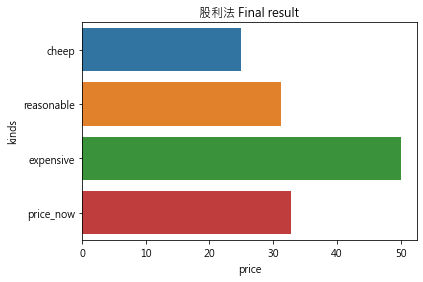

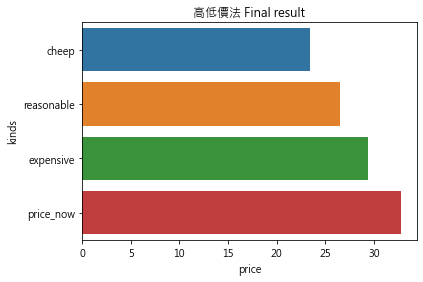

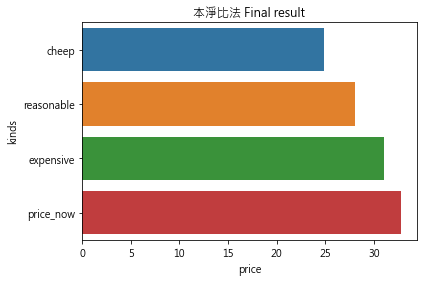

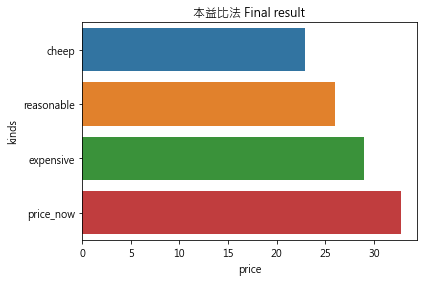

In [43]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

df1 = pd.DataFrame([
    ['cheep', cheep1],
    ['reasonable', reasonable1],
    ['expensive', expensive1],
    ['price_now', price_now],
], columns=['kinds', 'price'])
ax = sns.barplot(x='price', y='kinds', data=df1)
ax.set_title('股利法 Final result')
plt.show()


df2 = pd.DataFrame([
    ['cheep', cheep2],
    ['reasonable', reasonable2],
    ['expensive', expensive2],
    ['price_now', price_now],
], columns=['kinds', 'price'])
ax = sns.barplot(x='price', y='kinds', data=df2)
ax.set_title('高低價法 Final result')
plt.show()

df3 = pd.DataFrame([
    ['cheep', cheep3],
    ['reasonable', reasonable3],
    ['expensive', expensive3],
    ['price_now', price_now],
], columns=['kinds', 'price'])
ax = sns.barplot(x='price', y='kinds', data=df3)
ax.set_title('本淨比法 Final result')
plt.show()

df4 = pd.DataFrame([
    ['cheep', cheep4],
    ['reasonable', reasonable4],
    ['expensive', expensive4],
    ['price_now', price_now],
], columns=['kinds', 'price'])
ax = sns.barplot(x='price', y='kinds', data=df4)
ax.set_title('本益比法 Final result')
plt.show()


區間文字顯示

In [47]:
print("股票 : "+ stock + " 區間結果")
print("-------------------------------")
print("目前價位 : " + str(price_now))
print("-------------------------------")
print("股利法")
if price_now >= expensive1:
    print(stock+"目前為昂貴價")
if price_now <= cheep1:  
    print(stock+"目前為便宜價")
if price_now > cheep1 and price_now < reasonable1:  
    print(stock+"目前為合理偏低")
if price_now > reasonable1 and price_now < expensive1:  
    print(stock+"目前為合理偏高")
print("-----------------------")
print("高低價法")
if price_now >= expensive2:
    print(stock+"目前為昂貴價")
if price_now <= cheep2:  
    print(stock+"目前為便宜價")
if price_now > cheep2 and price_now < reasonable2:  
    print(stock+"目前為合理偏低")
if price_now > reasonable2 and price_now < expensive2:  
    print(stock+"目前為合理偏高")
print("-----------------------")
print("本淨比法")
if price_now >= expensive3:
    print(stock+"目前為昂貴價")
if price_now <= cheep3:  
    print(stock+"目前為便宜價")
if price_now > cheep3 and price_now < reasonable3:  
    print(stock+"目前為合理偏低")
if price_now > reasonable3 and price_now < expensive3:  
    print(stock+"目前為合理偏高")
print("-----------------------")
print("本益比法")
if price_now >= expensive4:
    print(stock+"目前為昂貴價")
if price_now <= cheep4:  
    print(stock+"目前為便宜價")
if price_now > cheep4 and price_now < reasonable4:  
    print(stock+"目前為合理偏低")
if price_now > reasonable4 and price_now < expensive4:  
    print(stock+"目前為合理偏高")

股票 : 2886 區間結果
-------------------------------
目前價位 : 32.75
-------------------------------
股利法
2886目前為合理偏高
-----------------------
高低價法
2886目前為昂貴價
-----------------------
本淨比法
2886目前為昂貴價
-----------------------
本益比法
2886目前為昂貴價
